In [105]:
import tensorflow as tf
import csv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import pandas as pd
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras import optimizers
from keras.layers.advanced_activations import PReLU, LeakyReLU
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [106]:
%matplotlib inline

### Reading the CSV file and cleaning

feature dataframe has the features read except for the first (seq_num) and the last column (label)
The dataframe also drop the Glucose column and replaces all NaN values and 7,9 (in labels) to 0

Features were also normalized - (features - features.mean())/features.std()

In [107]:
df = pd.read_csv('../Data/Dataset_v3.csv')


#Dropped Glucose
df = df.drop('Glucose', 1)

column_names = list(df)

df.fillna(0, inplace=True)
print column_names

features = df.iloc[:, 1:-1]
label = df.iloc[:,-1]

column_names = list(features)

label.replace(to_replace='7', value=0, inplace=True)
label.replace(to_replace='9', value=0, inplace=True)

normalized_features = (features - features.mean())/features.std()

['SEQN', 'GENDER', 'AGE', 'WIEGHT', 'HIEGHT', 'BMI', 'Waist', 'Race_ethinicity', 'Physical_activity', 'Diabetes']


### Formatting input for Machine Learning

In [108]:
X = normalized_features.as_matrix()

# lb = preprocessing.LabelBinarizer()
# Y = lb.fit_transform(label.as_matrix())
Y = label.as_matrix()

print X.shape
print Y.shape

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

y_train = keras.utils.to_categorical(y_train, num_classes=None)
y_test = keras.utils.to_categorical(y_test, num_classes=None)

Y = keras.utils.to_categorical(Y, num_classes=None)

print y_test

(31126, 8)
(31126,)
(21788, 'train sequences')
(9338, 'test sequences')
(4.0, 'classes')
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 ..., 
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]]


### Deep Net

In [112]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(4, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, nb_epoch=50, batch_size=10,  verbose=2)

/Users/somya/.virtualenvs/ml/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform", input_shape=(8,))`
  
/Users/somya/.virtualenvs/ml/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/somya/.virtualenvs/ml/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Train on 20854 samples, validate on 10272 samples
Epoch 1/50
7s - loss: 0.1885 - acc: 0.9474 - val_loss: 0.1349 - val_acc: 0.9469
Epoch 2/50
8s - loss: 0.1228 - acc: 0.9509 - val_loss: 0.1308 - val_acc: 0.9467
Epoch 3/50
8s - loss: 0.1210 - acc: 0.9525 - val_loss: 0.1296 - val_acc: 0.9476
Epoch 4/50
7s - loss: 0.1200 - acc: 0.9531 - val_loss: 0.1294 - val_acc: 0.9505
Epoch 5/50
7s - loss: 0.1194 - acc: 0.9541 - val_loss: 0.1287 - val_acc: 0.9506
Epoch 6/50
7s - loss: 0.1187 - acc: 0.9546 - val_loss: 0.1277 - val_acc: 0.9499
Epoch 7/50
6s - loss: 0.1182 - acc: 0.9555 - val_loss: 0.1288 - val_acc: 0.9469
Epoch 8/50
7s - loss: 0.1178 - acc: 0.9559 - val_loss: 0.1272 - val_acc: 0.9493
Epoch 9/50
7s - loss: 0.1171 - acc: 0.9569 - val_loss: 0.1274 - val_acc: 0.9474
Epoch 10/50
7s - loss: 0.1166 - acc: 0.9571 - val_loss: 0.1262 - val_acc: 0.9587
Epoch 11/50
7s - loss: 0.1158 - acc: 0.9582 - val_loss: 0.1258 - val_acc: 0.9529
Epoch 12/50
8s - loss: 0.1155 - acc: 0.9583 - val_loss: 0.1282 - val

In [ ]:
# score = model.evaluate(x_test, y_test, verbose=1)
# print("\n")
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])



#### Plotting loss and accuracy by Epoch

['acc', 'loss', 'val_acc', 'val_loss']


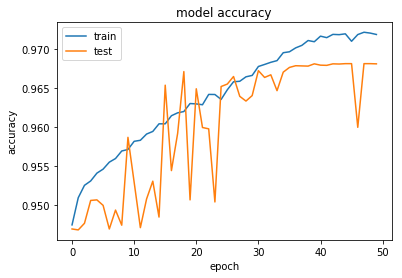

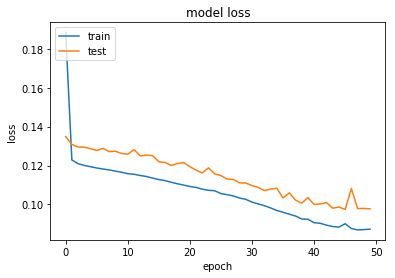

In [113]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Plotting ROC for Deep Net

9080/9338 [============================>.] - ETA: 0s

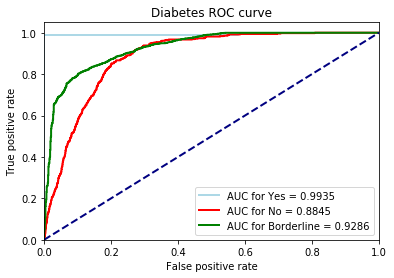

In [114]:
y_score = model.predict_proba(x_test, batch_size=10, verbose=1)
label_test = np.array(y_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plotting
plt.figure()
lw = 2
colors = ['lightblue', 'red', 'green']
lab = ['Yes', 'No', 'Borderline']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=lw,
             label='AUC for {0} = {1:.4f}'.format(lab[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Diabetes ROC curve")
plt.legend(loc='lower right')
plt.show()

#### Comparision with Decision Trees and Random Forest 
RF number of trees - 50


In [115]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# These are the tuned paramters


def decision_tree(feat_train, feat_test, label_train, label_test):
    clf = tree.DecisionTreeClassifier(class_weight=None,
                                      criterion='gini', splitter='best')
    clf.fit(feat_train, label_train)
    predicted_labels = clf.predict(feat_test)
    label_test = np.array(label_test)
    result = {}
    result['recall'] = recall_score(label_test, predicted_labels,
                                    average='weighted')
    result['accuracy'] = accuracy_score(label_test, predicted_labels)
    result['precision'] = precision_score(label_test, predicted_labels,
                                          average='weighted')
    return result['accuracy'], result['precision'], result['recall']


def random_forest(feat_train, feat_test, label_train, label_test):
    clf = RandomForestClassifier(n_estimators=50)

    clf.fit(feat_train, label_train)
    predicted_labels = clf.predict(feat_test)
    label_test = np.array(label_test)
    result = {}
    result['recall'] = recall_score(label_test, predicted_labels,
                                    average='weighted')
    result['accuracy'] = accuracy_score(label_test, predicted_labels)
    result['precision'] = precision_score(label_test, predicted_labels,
                                          average='weighted')
    return result['accuracy'], result['precision'], result['recall']

print("Random forest")
print(random_forest(x_train, x_test, y_train, y_test))
print('Decision Tree')
print(decision_tree(x_train, x_test, y_train, y_test))

Random forest
(0.9352109659455986, 0.90100620816801003, 0.9352109659455986)
Decision Tree
(0.90479760119940034, 0.9094854736474357, 0.90479760119940034)


#### Plotting of ROC Curves for Decision trees and Random Forest

Random Forest


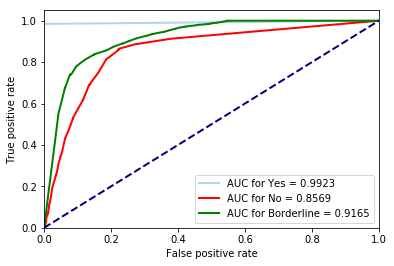

Decision Trees


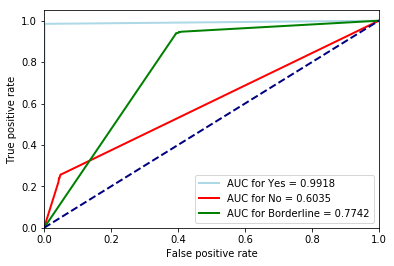

In [116]:
def plot_roc_curve_with(feat_train, feat_test, label_train, label_test, classifier):
    # calculating the scores
    # ytrain = label_binarize(label_train, classes=[0, 1, 2])
    classifier.fit(feat_train, label_train)
    y_score = classifier.predict_proba(feat_test)
    scores = [[] for _ in range(len(y_score[0]))]
    for score in y_score:
        for i, s in enumerate(score):
            scores[i].append(s[1])
    scores = np.array(scores)
    label_test = np.array(label_test)
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(label_test[:, i], scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting
    plt.figure()
    lw = 2
    colors = ['lightblue', 'red', 'green']
    lab = ['Yes', 'No', 'Borderline']
    for i in range(3):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=lw,
                 label='AUC for {0} = {1:.4f}'.format(lab[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='lower right')
    plt.show()

print("Random Forest")
plot_roc_curve_with(x_train, x_test, y_train, y_test, RandomForestClassifier(n_estimators=50))
print("Decision Trees")
plot_roc_curve_with(x_train, x_test, y_train, y_test, tree.DecisionTreeClassifier(class_weight=None,
                                      criterion='gini', splitter='best'))

#### Top features by Random Forest

['AGE', 'WIEGHT', 'HIEGHT', 'Waist', 'BMI', 'Physical_activity', 'Race_ethinicity', 'GENDER']
Key
(1, 'AGE')
(2, 'WIEGHT')
(3, 'HIEGHT')
(5, 'Waist')
(4, 'BMI')
(7, 'Physical_activity')
(6, 'Race_ethinicity')
(0, 'GENDER')


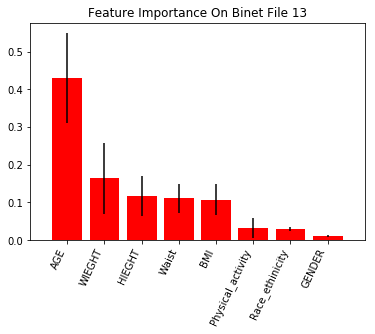

In [117]:
def classify(feat_train, feat_test, label_train, label_test, classifier):
    # calculating the scores
    # ytrain = label_binarize(label_train, classes=[0, 1, 2])
    classifier.fit(feat_train, label_train)
    return classifier

    
rf = classify(x_train, x_test, y_train, y_test, RandomForestClassifier(n_estimators=50))
importances = rf.feature_importances_

std = np.std([t.feature_importances_ for t in rf.estimators_],
            axis=0)

indices = np.argsort(importances)[::-1]
orders = column_names
xtick = []

for i in indices:
    xtick.append(orders[i])

fig, ax = plt.subplots()
print(xtick)
plt.setp(ax.get_xticklabels(), rotation=65, horizontalalignment='right')
ax.bar(range(x_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
ax.set_title("Feature Importance On Binet File 13")
ax.set_xticks(np.arange(len(xtick)))
ax.set_xticklabels(xtick)
ax.set_xlim([-1, x_test.shape[1]])

fig.show()


print("Key")
for i in indices:
    print(i, orders[i])